In [32]:
import torch
import torch.nn as nn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
inputs = torch.tensor(
[[0.43, 0.15, 0.89], # Your (x^1)
[0.55, 0.87, 0.66], # journey (x^2)
[0.57, 0.85, 0.64], # starts (x^3)
[0.22, 0.58, 0.33], # with (x^4)
[0.77, 0.25, 0.10], # one (x^5)
[0.05, 0.80, 0.55]] # step (x^6)
)

In [3]:
querry=inputs[1]
w21=inputs[1]@querry
atten_scores_2=torch.tensor([x@querry for x in inputs])
print(atten_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [4]:
def softmax_naive(x):
    return torch.exp(x)/torch.exp(x).sum(dim=0)

In [7]:
attention_weights=softmax_naive(atten_scores_2)
attention_weights


tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])

In [9]:
# softmax normalization using pytorch's optimized softmax method
attention_weights=torch.softmax(atten_scores_2,dim=0)
attention_weights


tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])

In [11]:
# Context vector
inputs.shape, attention_weights.shape

(torch.Size([6, 3]), torch.Size([6]))

In [12]:
attention_weights@inputs

tensor([0.4419, 0.6515, 0.5683])

In [13]:
z_2=inputs.T@attention_weights

In [14]:
# Computing attention weights for all input vectors
attn_scores=torch.tensor([[x@querry for x in inputs] for querry in inputs])
# compute attention weights by softmax normalizing attention scores
attn_weights=torch.stack([torch.softmax(x,dim=0) for x in attn_scores])

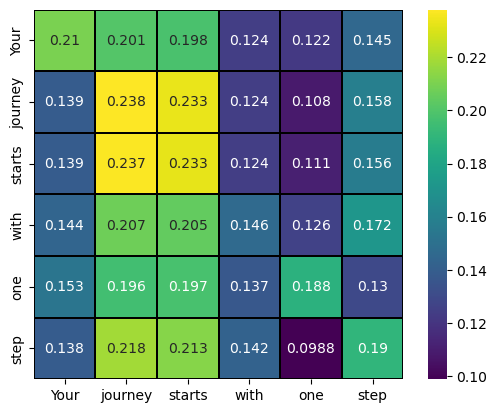

In [15]:
# Visualize the attn_weights as correlation matrix
sns.heatmap(attn_weights,xticklabels=['Your' ,'journey','starts','with','one','step'],yticklabels=['Your' ,'journey','starts','with','one','step'],
robust=False,annot=True,cmap='viridis',linecolor='black',linewidths=0.005,
   fmt='.3g',square=True,)
plt.show()

In [16]:
attention_weights

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])

In [17]:
# Context Vectorss
context_vecs=attn_weights@inputs
context_vecs

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])

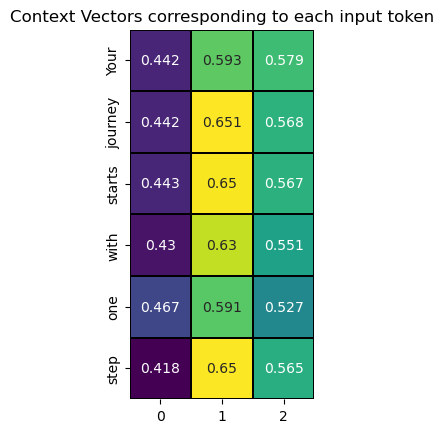

In [18]:
sns.heatmap(context_vecs,xticklabels='auto',yticklabels=['Your' ,'journey','starts','with','one','step'],
robust=False,annot=True,cmap='viridis',linecolor='black',linewidths=0.005,
   fmt='.3g',square=True,cbar=False)
plt.title('Context Vectors corresponding to each input token')
plt.show()

### Implementing self-attention with trainable weights
This self-attention mechanism is also called scaled dot product attention. We want to compute context vectors
as weighted sums over the input vectors specific to a certain input element.<br> 
In the first step of the self-attention mechanism with trainable weight matrices, we
compute query (q), key (k), and value (v) vectors for input elements x<br>
The query vector q
(2)
is obtained
via matrix multiplication between the input x
(2) and the weight matrix Wq.
<br>Similarly, we obtain
the key and value vectors via matrix multiplication involving the weight matrices Wk and Wv

In [29]:
torch.manual_seed(2345)
x_2=inputs[1]  # querry input
d_in = inputs.shape[1]
d_out=2

W_query = torch.nn.Parameter(torch.rand(d_in, d_out),requires_grad=False)
W_key =  torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value=torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)


query_2 = x_2@W_query


torch.Size([2])

Weight parameters are the fundamental, learned coefficients that
define the network's connections, while attention weights are dynamic,
context-specific values.<br>
Even though our temporary goal is to only compute the one context vector,
z
(2)
, we still require the key and value vectors for all input elements as they
are involved in computing the attention weights with respect to the query q
(2)

In [30]:
keys = inputs@W_key
values = inputs@W_value
values

tensor([[0.4204, 0.7237],
        [0.8305, 1.0672],
        [0.8125, 1.0579],
        [0.5063, 0.5819],
        [0.2597, 0.5928],
        [0.7082, 0.7108]])

In [31]:
print("keys.shape:", keys.shape)
print("values.shape:", values.shape)

keys.shape: torch.Size([6, 2])
values.shape: torch.Size([6, 2])


As we can tell from the outputs, we successfully projected the 6 input tokens
from a 3D onto a 2D embedding space

A "query" is analogous to a search query in a database. It represents the
current item (e.g., a word or token in a sentence) the model focuses on or
tries to understand. The query is used to probe the other parts of the input
sequence to determine how much attention to pay to them.
<br>The "key" is like a database key used for indexing and searching. In the
attention mechanism, each item in the input sequence (e.g., each word in a
sentence) has an associated key. These keys are used to match with the query.
<br>The "value" in this context is similar to the value in a key-value pair in a
database. It represents the actual content or representation of the input items.
Once the model determines which keys (and thus which parts of the input)
are most relevant to the query (the current focus item), it retrieves the
corresponding values.

### Implementing a compact self-attention Python class

In [ ]:
import torch